In [0]:
%tensorflow_version 2.x

## step0: 載入資料並觀察

In [2]:
# TensorFlow v2.0 已完整支持 Keras v2.3 -> tensorflow.keras
# 載入資料集：Fashion-MNIST database of fashion articles
from tensorflow.keras.datasets.fashion_mnist import load_data

load_data()
# return a Tuple of Numpy arrays: ((x_train, y_train), (x_test, y_test))

4423680/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [0]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
# shape 維度：return (資料筆數, 圖片高, 圖片寬, 像素通道數)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


9


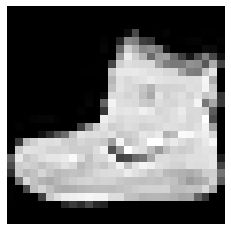

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

print(y_train[0])
plt.axis("off")
plt.imshow(x_train[0], cmap="gray")

In [6]:
import pandas as pd

pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


## step1: 資料預處理

### 對題目做 normalize (常態化)
1. tensorflow MLP 規定 input 只能是一維 (1D)，故要做 reshape
2. input 介於 [0, 1] 或 [-1, 1] 較方便設定權值並迭代，故要除 255
3. 除 255，是因為圖片顏色介於 [0, 255]

In [7]:
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm  = x_test.reshape(-1, 784) / 255

pd.DataFrame(x_train_norm[0])

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
779,0.0
780,0.0
781,0.0
782,0.0


### 對答案做 one-hot encoding
- 將答案變成機率的格式：`[P0, P1, P2, ... , P9]`
- 例如預測「 5 」的機率：`[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat  = to_categorical(y_test)

print('前：', y_train[0])
print('後：', y_train_cat[0])

前： 9
後： [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## step2: 訓練模型

### 建立模型：Sequential
- **`Dropout`：隨機丟棄神經元**  
  在訓練資料時，故意隨機丟掉 25-50% 的神經元  
  在測試資料時，將當初訓練的 權值*(1-dropout)  
  例如：隨機丟棄神經元 dropout=25%，則預測時的權值需要調整為 0.75權值

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

mlp = Sequential()
mlp.add(Dense(128, activation="relu", input_dim=784))
mlp.add(Dropout(0.25))  # 隨機丟棄25%神經元
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 確定模型訓練方式

In [0]:
mlp.compile(loss="categorical_crossentropy", 
            optimizer="adam", 
            metrics=["accuracy"])

### 訓練模型
- `callbacks`：回調函數，會在訓練階段中使用
  - `EarlyStopping`：當 `val_loss` 提高時，停止訓練
  - `ModelCheckpoint`：在訓練完成後，保存模型

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

stop_callback = EarlyStopping(monitor='val_loss', 
                              patience=3,                 # 連續上升 3 次就停止訓練
                              restore_best_weights=True)  # 會將權值調回最好的那一次

save_callback = ModelCheckpoint("fashion.h5",             # 儲存檔名
                                save_best_only=True)      # 只儲存最好的模型與權值

mlp.fit(x_train_norm, 
        y_train_cat, 
        batch_size=200,
        epochs=100,                               # epochs 多次沒關係
        callbacks=[stop_callback, save_callback], # 因為有 EarlyStopping 會自己停
        validation_split=0.1,
        verbose=2)

Epoch 1/100
270/270 - 1s - loss: 0.6672 - accuracy: 0.7702 - val_loss: 0.4523 - val_accuracy: 0.8377
Epoch 2/100
270/270 - 1s - loss: 0.4543 - accuracy: 0.8416 - val_loss: 0.4072 - val_accuracy: 0.8552
Epoch 3/100
270/270 - 1s - loss: 0.4110 - accuracy: 0.8541 - val_loss: 0.3831 - val_accuracy: 0.8613
Epoch 4/100
270/270 - 1s - loss: 0.3829 - accuracy: 0.8628 - val_loss: 0.3571 - val_accuracy: 0.8697
Epoch 5/100
270/270 - 1s - loss: 0.3647 - accuracy: 0.8698 - val_loss: 0.3622 - val_accuracy: 0.8682
Epoch 6/100
270/270 - 1s - loss: 0.3491 - accuracy: 0.8738 - val_loss: 0.3430 - val_accuracy: 0.8727
Epoch 7/100
270/270 - 1s - loss: 0.3374 - accuracy: 0.8782 - val_loss: 0.3468 - val_accuracy: 0.8777
Epoch 8/100
270/270 - 1s - loss: 0.3256 - accuracy: 0.8817 - val_loss: 0.3310 - val_accuracy: 0.8755
Epoch 9/100
270/270 - 1s - loss: 0.3165 - accuracy: 0.8853 - val_loss: 0.3310 - val_accuracy: 0.8777
Epoch 10/100
270/270 - 1s - loss: 0.3095 - accuracy: 0.8866 - val_loss: 0.3156 - val_accura

## step3: 預測結果

In [12]:
# predict 機率
# predict_classes 分類/類別
pre = mlp.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, ..., 8, 1, 5])

## step4: 驗證模型

In [13]:
mlp.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8884


[0.32069528102874756, 0.8884000182151794]

### 分類準確性評估 (混淆矩陣)

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np

names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
         "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

c = [f"{i}(預測)" for i in names] 
i = [f"{i}(正確)" for i in names] 
mat = confusion_matrix(y_test, pre)
mat = [np.round(row/sum(row), 4) for row in mat]

pd.DataFrame(mat, columns=c, index=i)

,T-shirt/top(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt/top(正確),0.838,0.002,0.023,0.028,0.002,0.001,0.103,0.000,0.003,0.000
Trouser(正確),0.000,0.974,0.002,0.017,0.003,0.000,0.003,0.000,0.001,0.000
Pullover(正確),0.015,0.000,0.802,0.008,0.110,0.000,0.064,0.000,0.001,0.000
Dress(正確),0.019,0.005,0.015,0.892,0.036,0.000,0.031,0.000,0.002,0.000
Coat(正確),0.000,0.001,0.079,0.021,0.839,0.000,0.058,0.000,0.002,0.000
Sandal(正確),0.000,0.000,0.000,0.000,0.000,0.963,0.000,0.023,0.001,0.013
Shirt(正確),0.119,0.002,0.097,0.026,0.065,0.000,0.685,0.000,0.006,0.000
Sneaker(正確),0.000,0.000,0.000,0.000,0.000,0.016,0.000,0.967,0.000,0.017
Bag(正確),0.006,0.000,0.007,0.003,0.005,0.001,0.005,0.004,0.969,0.000
Ankle boot(正確),0.000,0.000,0.000,0.000,0.000,0.007,0.001,0.037,0.000,0.955


### 印出預測錯誤的圖像


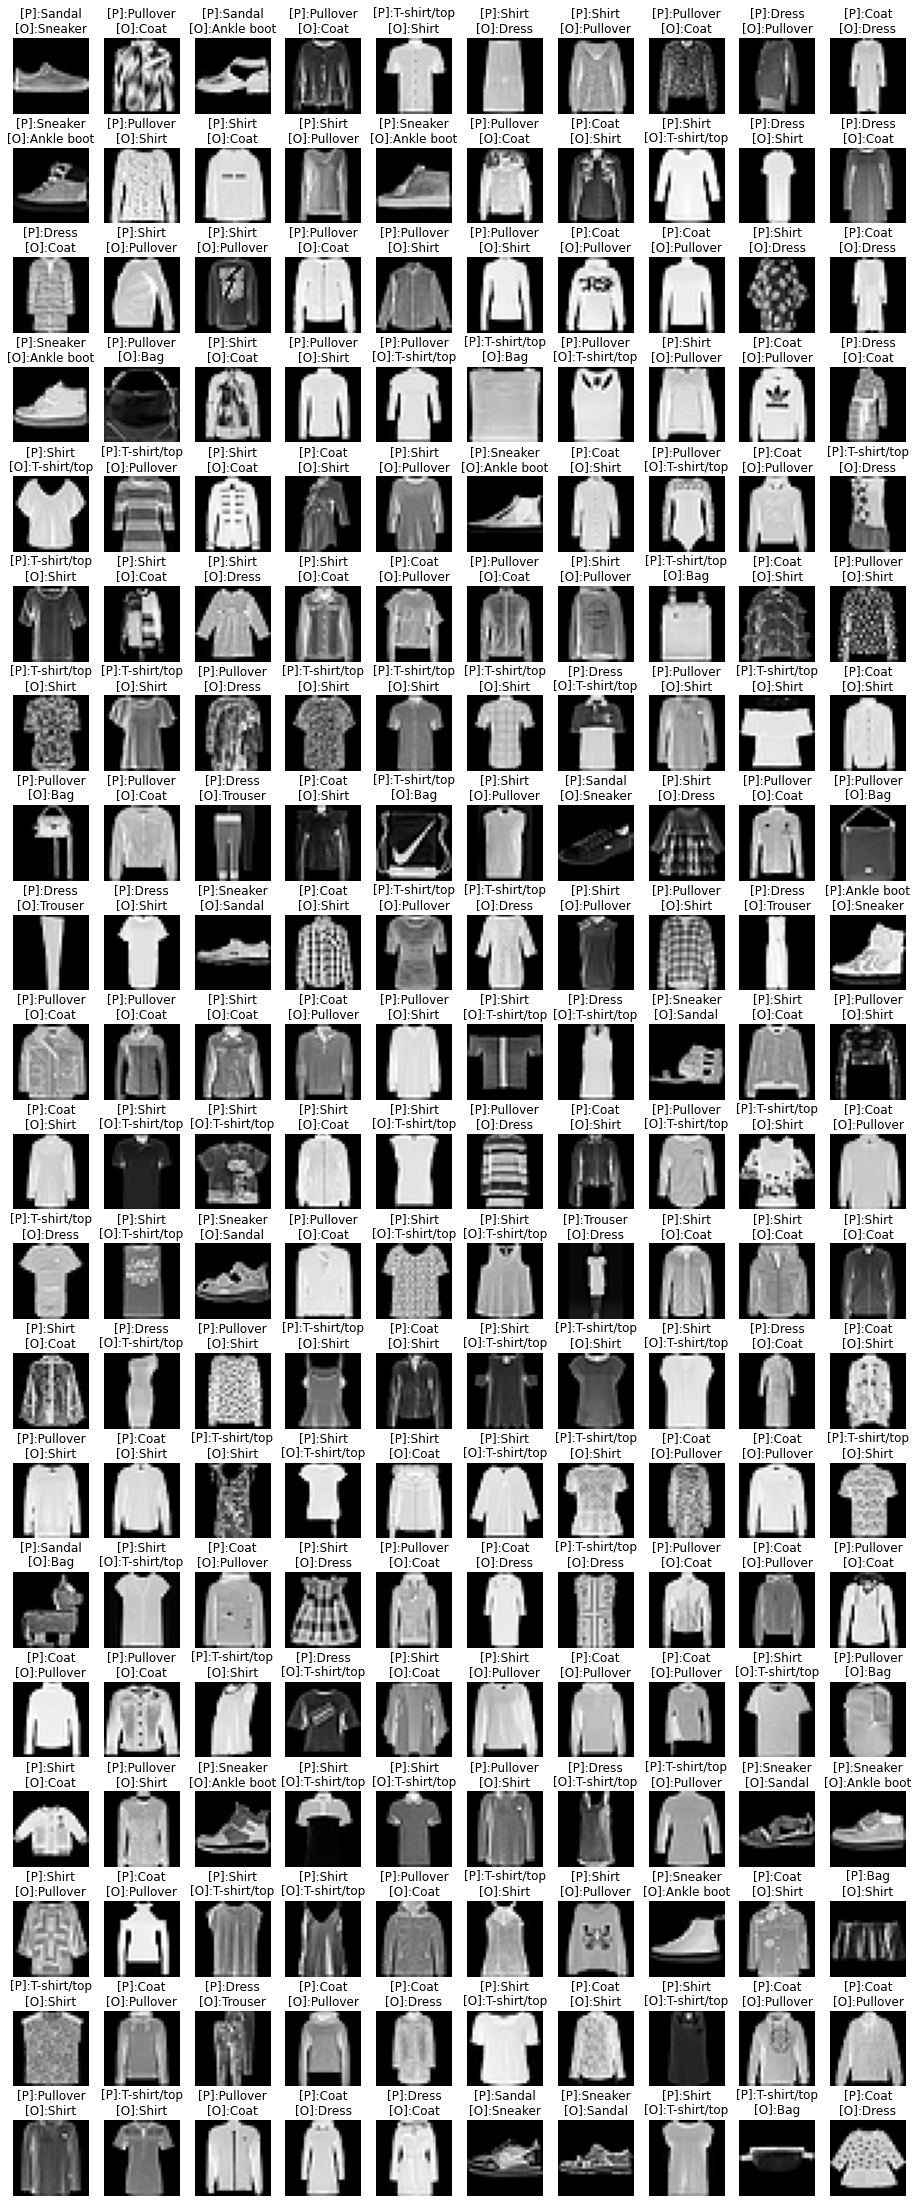

In [15]:
idx = np.nonzero(pre != y_test)[0][:200] # 錯誤太多，故只查看前200張
false_pre_img = x_test[idx]
false_pre_label = y_test[idx]
false_pre_predict = pre[idx]

plt.figure(figsize=(16, 42))
width = 10 
height = len(idx) // width + 1

for i, img in enumerate(false_pre_img):    
    plt.subplot(height, width, i+1)      # subplot(總高, 總寬, 第i張)
    plt.title(f"[P]:{names[false_pre_predict[i]]}\n[O]:{names[false_pre_label[i]]}")
    plt.axis("off")
    plt.imshow(img, cmap="gray")

## step5: 儲存模型
- 想看 *.h5檔 可以下載：https://support.hdfgroup.org/products/java/release/download.html

In [0]:
mlp.save("mlp_fashion.h5")

## step6: 讀取模型
- 讀取完可做：`fit`, `predict`, `evaluate`
- 但不需要做：`compile`


In [17]:
from tensorflow.keras.models import load_model

loaded = load_model("fashion.h5")
loaded.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8884


[0.32069528102874756, 0.8884000182151794]